In [ ]:
method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE).

var sse = {};
for (var k = 1; k <= maxK; ++k) {
    sse[k] = 0;
    clusters = kmeans(dataset, k);
    clusters.forEach(function(cluster) {
        mean = clusterMean(cluster);
        cluster.forEach(function(datapoint) {
            sse[k] += Math.pow(datapoint - mean, 2);
        });
    });
}

Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.


In [3]:
# K-Means Clustering

# Importing the libraries
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [4]:
X = np.array([[1, 2],
              [5, 8],
              [1.5, 1.8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)


[[7.33333333 9.        ]
 [1.16666667 1.46666667]]
[1 0 1 0 1 0]


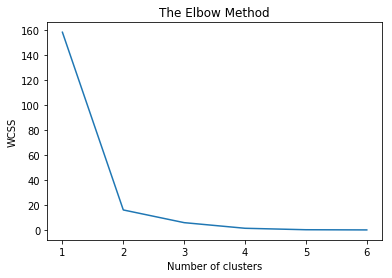

In [8]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []

#max cluster should be less than rows
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

coordinate: [1. 2.] label: 1
coordinate: [5. 8.] label: 0
coordinate: [1.5 1.8] label: 1
coordinate: [8. 8.] label: 0
coordinate: [1.  0.6] label: 1
coordinate: [ 9. 11.] label: 0


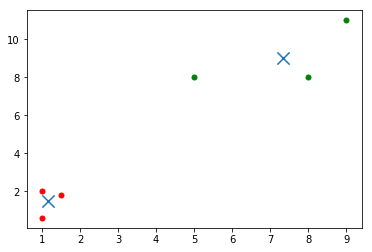

In [9]:
colors = ["g.","r.","c.","y."]

for i in range(len(X)):
    print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()